In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
import math
from scipy.optimize import minimize_scalar,minimize

In [2]:
class MooneyRivlin:

    def __init__(self,P,A,B):
        self.P = P
        self.A = A
        self.B = B
        self.bnds2d = ((1, 10), (1,None))
        self.bnds3d = ((1, 10), (1,None),(1,None))
    
    def objective_3d(self,params):
        x,y,z=params
        I1 = x**2+y**2+z**2
        I2 = (x*y)**2+(y*z)**2+(z*x)**2
        return (self.A)*(I1-3) + (self.B)*(I2-3) - (self.P)*(x) # For 1-D testing

    def objective_2d(self,params):
        x,y=params
        z = (1/x*y)
        I1 = x**2+y**2+z**2
        I2 = (x*y)**2+(y*z)**2+(z*x)**2
        return (self.A)*(I1-3) + (self.B)*(I2-3) - (self.P)*(x) # For 1-D testing

    def return_min(self,start):
        if(len(start)==3):
            res = minimize(self.objective_3d,x0=start,bounds=self.bnds3d)
            return res
        else:
            res = minimize(self.objective_2d,x0=start,bounds = self.bnds2d)
            return res 
    
    def calc_energy(self,params):
        if(len(params)==3):
            x1,x2,x3 = params
            I1 = x1**2+x2**2+x3**2
            I2 = (x1*x2)**2+(x2*x3)**2+(x3*x1)**2
            return (self.A)*(I1-3)+(self.B)*(I2-3)
        else:
            x1,x2=params
            x3 = 1/(x1*x2)
            I1 = x1**2+x2**2+x3**2
            I2 = (x1*x2)**2+(x2*x3)**2+(x3*x1)**2
            return (self.A)*(I1-3)+(self.B)*(I2-3)

In [3]:
class Plotter_MooneyRivlin:
    def __init__(self,index,soln,energy):
        self.index = index
        self.soln = soln
        self.energy = energy
        self.solnx = []
        self.solny = []
        for i in soln[self.index]:
            self.solnx.append(i[0])
            self.solny.append(i[1])

    def force_stretch(self):
        plt.plot(self.solnx,P,'r+')
        plt.xlabel('Stretch parameter',fontname='Times New Roman')
        plt.ylabel('Force',fontname='Times New Roman')
        plt.title("Force vs Stretch parameter")
        plt.show()

    def energy_stretch(self):
        lamdax = []
        lamday = []
        lamdaz = []

        for i in self.soln[self.index]:
            lamdax.append([i[0]])
            lamday.append(i[1])
            if(len(self.soln[self.index])==3):
                lamdaz.append(i[2])
            else:
                lamdaz.append(1/(i[0]*i[1]))
        plt.plot(lamdax,self.energy[self.index],'bo')
        plt.xlabel('Stretch parameter x',fontname='Times New Roman')
        plt.ylabel('Energy',fontname='Times New Roman')
        plt.title("Energy vs Stretch parameter x")
        plt.show()

        plt.plot(lamday,self.energy[self.index],'bo')
        plt.xlabel('Stretch parameter y',fontname='Times New Roman')
        plt.ylabel('Energy',fontname='Times New Roman')
        plt.title("Energy vs Stretch parameter y")
        plt.show()

        plt.plot(lamdaz,self.energy[self.index],'bo')
        plt.xlabel('Stretch parameter z',fontname='Times New Roman')
        plt.ylabel('Energy',fontname='Times New Roman')
        plt.title("Energy vs Stretch parameter z")
        plt.show()
    
    def calc_energy(self,params):
        if(len(params)==3):
            x1,x2,x3 = params
            I1 = x1**2+x2**2+x3**2
            I2 = (x1*x2)**2+(x2*x3)**2+(x3*x1)**2
            return (A[self.index])*(I1-3) + (B[self.index])*(I2-3) - P[350]*x1
        else:
            x1,x2=params
            x3 = 1/(x1*x2)
            I1 = x1**2+x2**2+x3**2
            I2 = (x1*x2)**2+(x2*x3)**2+(x3*x1)**2
            return (A[self.index])*(I1-3) + (B[self.index])*(I2-3) - P[350]*x1
    
    def check_min_lamda_2d(self):
        lamdax = np.linspace(1,10,500)
        lamday = np.ones(500)
        lamdas = []
        for i in range(500):
            lamdas.append([lamdax[i],lamday[i]])

        energy_calc = [self.calc_energy(lamdas[i]) for i in range(500)]
        plt.plot(lamdax,energy_calc)
        plt.axvline(x = self.solnx[350], color = 'purple', label = 'axvline - full height')
        plt.xlabel('Stretch parameter',fontname='Times New Roman')
        plt.ylabel('Energy',fontname='Times New Roman')
        plt.title(f'Plot Showing lamda = {np.round(self.solnx[350],2)} is minimum energy for force = {np.round(P[350],2)}')

    def check_min_lamda_3d(self):
        lamdax = np.linspace(1,10,500)
        lamday = np.ones(500)
        lamdaz = np.ones(500)
        lamdas = []
        for i in range(500):
            lamdas.append([lamdax[i],lamday[i],lamdaz[i]])

        energy = [self.calc_energy(lamdas[i]) for i in range(500)]
        plt.plot(lamdax,energy)
        plt.axvline(x = self.solnx[350], color = 'purple', label = 'axvline - full height')
        plt.xlabel('Stretch parameter',fontname='Times New Roman')
        plt.ylabel('Energy',fontname='Times New Roman')
        plt.title(f'Plot Showing lamda = {np.round(self.solnx[350],2)} is minimum energy for force = {np.round(P[350],2)}')

In [4]:
P = np.logspace(1,2.4,500)
A = np.linspace(1,7,500)
B = np.linspace(10,20,500)

In [5]:
soln_2d = []
energy_2d = []
for k in range(500):
    temp_soln = []
    temp_energy =[]
    for i in range(len(P)):
        a = MooneyRivlin(P[i],A[k],B[k])
        res = a.return_min([1.,1.])
        temp_soln.append(res['x'])
        energy_node = a.calc_energy(res['x'])
        temp_energy.append(energy_node)
    soln_2d.append(temp_soln)
    energy_2d.append(temp_energy)

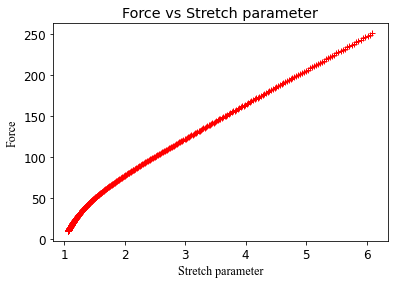

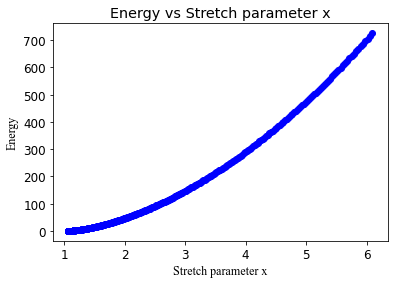

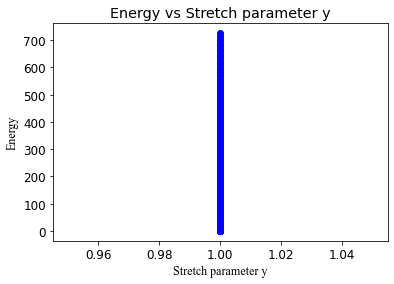

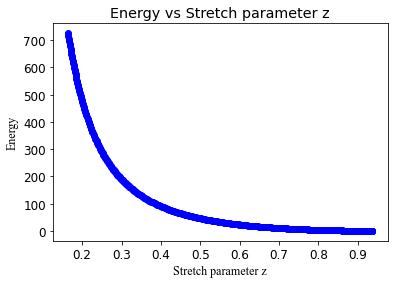

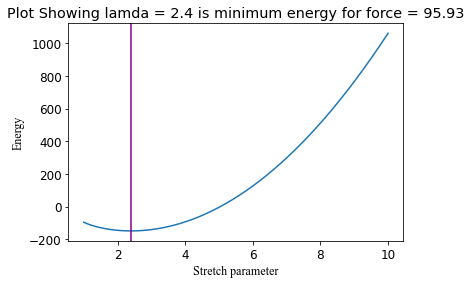

In [6]:
a = Plotter_MooneyRivlin(300,soln_2d,energy_2d)
a.force_stretch()
a.energy_stretch()
a.check_min_lamda_2d()

In [7]:
P = np.linspace(60,250,500)
A = np.linspace(1,7,500)
B = np.linspace(10,20,500)

In [8]:
soln_3d = []
energy_3d = []
for k in range(500):
    temp_soln = []
    temp_energy =[]
    for i in range(len(P)):
        a = MooneyRivlin(P[i],A[k],B[k])
        res = a.return_min([1.,1.,1.])
        temp_soln.append(res['x'])
        energy_node = a.calc_energy(res['x'])
        temp_energy.append(energy_node)
    soln_3d.append(temp_soln)
    energy_3d.append(temp_energy) 

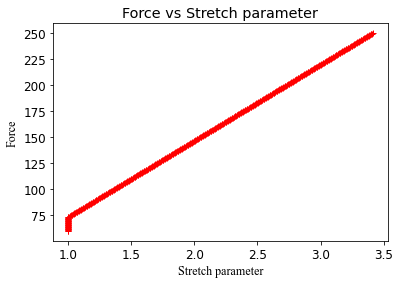

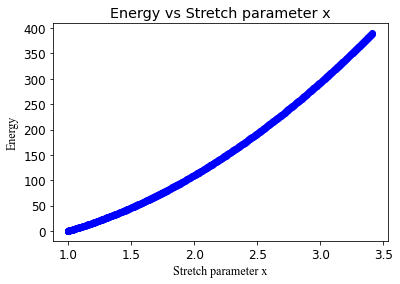

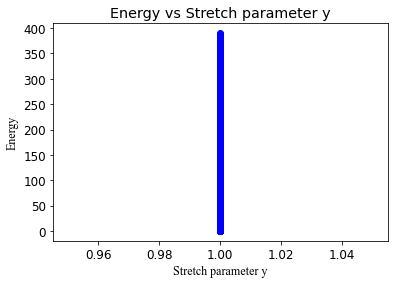

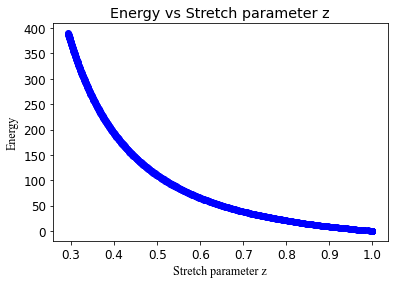

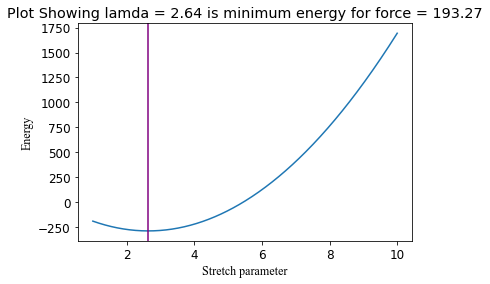

In [9]:
b = Plotter_MooneyRivlin(300,soln_3d,energy_3d)
b.force_stretch()
b.energy_stretch()
b.check_min_lamda_3d()

In [10]:
def calc_energy(params):
    if(len(params)==2):
        x1,x2 = params
        x3 = 1/(x1*x2)
        I1 = x1**2+x2**2+x3**2
        I2 = (x1*x2)**2+(x2*x3)**2+(x3*x1)**2
        return [(I1-3),(I2-3)]
    else:
        x1,x2,x3 = params
        I1 = x1**2+x2**2+x3**2
        I2 = (x1*x2)**2+(x2*x3)**2+(x3*x1)**2
        return [(I1-3),(I2-3)]

In [11]:
from sklearn.model_selection import train_test_split,cross_val_score,KFold,GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [12]:
data_2d = np.array([[calc_energy(x) for x in temp] for temp in soln_2d])

In [13]:
num_samples,nx,ny = data_2d.shape

In [14]:
dataset_2d = data_2d.reshape(num_samples,nx*ny)

In [15]:
Y = []
X = dataset_2d
for i in range(500):
    Y.append([A[i],B[i]])


In [16]:
X_train_2d,X_test_2d,y_train_2d,y_test_2d = train_test_split(X,Y,test_size=0.25)

In [17]:
print(np.array(X_train_2d).shape)

(375, 1000)


In [18]:
model_2d = RandomForestRegressor()
model_2d.fit(X_train_2d,y_train_2d)

RandomForestRegressor()

In [19]:
predictions = model_2d.predict(X_test_2d)
mean_squared_error(y_test_2d, predictions)

0.00012413724282232764

In [20]:
model_2d.predict(np.array(X_test_2d[100]).reshape(1,1000))

array([[ 2.41486974, 12.35811623]])

In [21]:
print(y_test_2d[100])

[2.4068136272545093, 12.344689378757515]


In [22]:
data_3d = np.array([[calc_energy(x) for x in temp] for temp in soln_3d])

In [23]:
num_samples,nx,ny = data_3d.shape

In [24]:
dataset_3d = data_3d.reshape(num_samples,nx*ny)

In [25]:
Y = []
X = dataset_3d
for i in range(500):
    Y.append([A[i],B[i]])

In [26]:
X_train_3d,X_test_3d,y_train_3d,y_test_3d = train_test_split(X,Y,test_size=0.25)

In [27]:
model_3d = RandomForestRegressor()
model_3d.fit(X_train_3d,y_train_3d)

RandomForestRegressor()

In [28]:
predictions = model_3d.predict(X_test_3d)
mean_squared_error(y_test_3d, predictions)

0.00014972786133392126

In [29]:
model_3d.predict(np.array(X_test_3d[100]).reshape(1,1000))

array([[ 3.10925852, 13.51543086]])

In [30]:
print(y_test_3d[100])

[3.1042084168336674, 13.507014028056112]
